##### Alphalens Tutorial Notebook #1

# Creating tear sheets with Alphalens

In the [previous lesson](link_to_prev), you learned what Alphalens is. In this lesson, you will learn a four step process for how to use it:

1. Express an alpha factor and define a trading universe by creating and running a Pipeline over a certain time period.
2. Query pricing data for the assets in our universe during that same time period with `get_pricing()`.
3. Align the alpha factor data with the pricing data with `get_clean_factor_and_forward_returns()`.
4. Visualize how well our alpha factor predicts future price movements with `create_full_tear_sheet()`.

## 1. Build and run a Pipeline
The following code expresses an alpha factor based on asset growth, then runs it with `run_pipeline()`

In [1]:
from quantopian.pipeline.data import factset 

from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters import QTradableStocksUS


def make_pipeline():
    
    # Measures a company's asset growth rate.
    asset_growth = factset.Fundamentals.assets_gr_qf.latest 
    
    return Pipeline(
        columns = {'Asset Growth': asset_growth},
        screen = QTradableStocksUS() & asset_growth.notnull()
    )


factor_data = run_pipeline(pipeline=make_pipeline(), start_date='2014-1-1', end_date='2016-1-1')

# Show the first 5 rows of factor_data
factor_data.head(5) 

ModuleNotFoundError: No module named 'quantopian'

## 2. Query pricing data

Now that we have factor data, let's get pricing data for the same time period. `get_pricing()` returns pricing data for a list of assets over a specified time period. It requires four arguments:
- A list of assets for which we want pricing.
- A start date (the same start date as `run_pipeline()`).
- An end date (must be *after* `run_pipeline()`'s end date. discussed more in lesson 4).
- Whether to use [open, high, low or close pricing](link_to_explanation).

In [3]:
pricing_data = get_pricing(
    symbols=factor_data.index.levels[1], # Finds all assets that appear at least once in "factor_data"  
    start_date='2014-1-1',
    end_date='2016-2-1', # must be after run_pipeline()'s end date. Explained more in lesson 4
    fields='open_price' # Generally, you should use open pricing. Explained more in lesson 4
)

# Show the first 5 rows of pricing_data
pricing_data.head(5)

## 3. Align data

`get_clean_factor_and_forward_returns()` aligns factor data from a Pipeline with pricing data from `get_pricing()`, and returns an object suitable for analysis with Alphalens' charting functions. It requires two arguments:
- The factor data we created with `run_pipeline()`.
- The pricing data we created with `get_pricing()`.

In [5]:
from alphalens.utils import get_clean_factor_and_forward_returns

merged_data = get_clean_factor_and_forward_returns(
    factor=factor_data, 
    prices=pricing_data
)

# Show the first 5 rows of merged_data
merged_data.head(5) 

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


## 4. Visualize results

Finally, pass the output of `get_clean_factor_and_forward_returns()` to a function called `create_full_tear_sheet()`.

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-100.000000,0.098852,-10.346533,10.231006,213789,20.018859
2,-4.618732,5.149827,0.709503,2.029576,213484,19.990299
3,1.278616,11.173284,6.200449,1.982810,213490,19.990861
4,7.772273,25.425679,14.927398,4.056657,213484,19.990299
5,21.577333,153701.600000,136.299141,2057.310559,213691,20.009682


Returns Analysis


,1D,5D,10D
Ann. alpha,-0.099,-0.123,-0.146
beta,0.189,0.121,0.085
Mean Period Wise Return Top Quantile (bps),0.327,0.028,-0.412
Mean Period Wise Return Bottom Quantile (bps),-2.250,-2.425,-2.395
Mean Period Wise Spread (bps),2.564,2.401,1.915


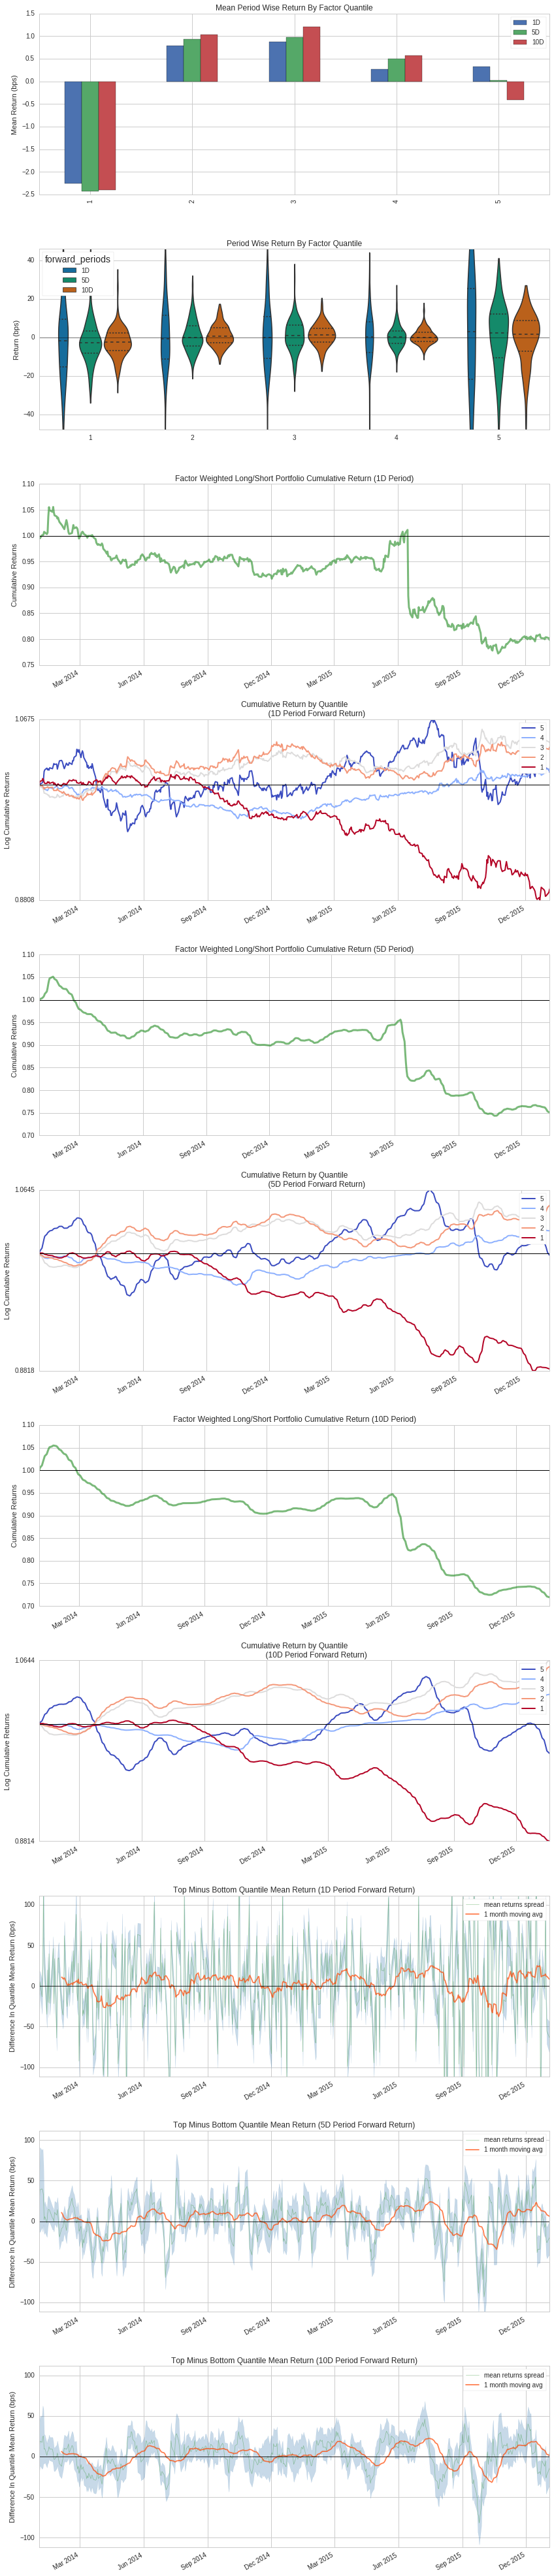

Information Analysis


,1D,5D,10D
IC Mean,0.005,0.010,0.010
IC Std.,0.084,0.084,0.086
Risk-Adjusted IC,0.058,0.122,0.112
t-stat(IC),1.297,2.732,2.525
p-value(IC),0.195,0.007,0.012
IC Skew,-0.226,-0.453,-0.474
IC Kurtosis,-0.246,-0.281,0.013


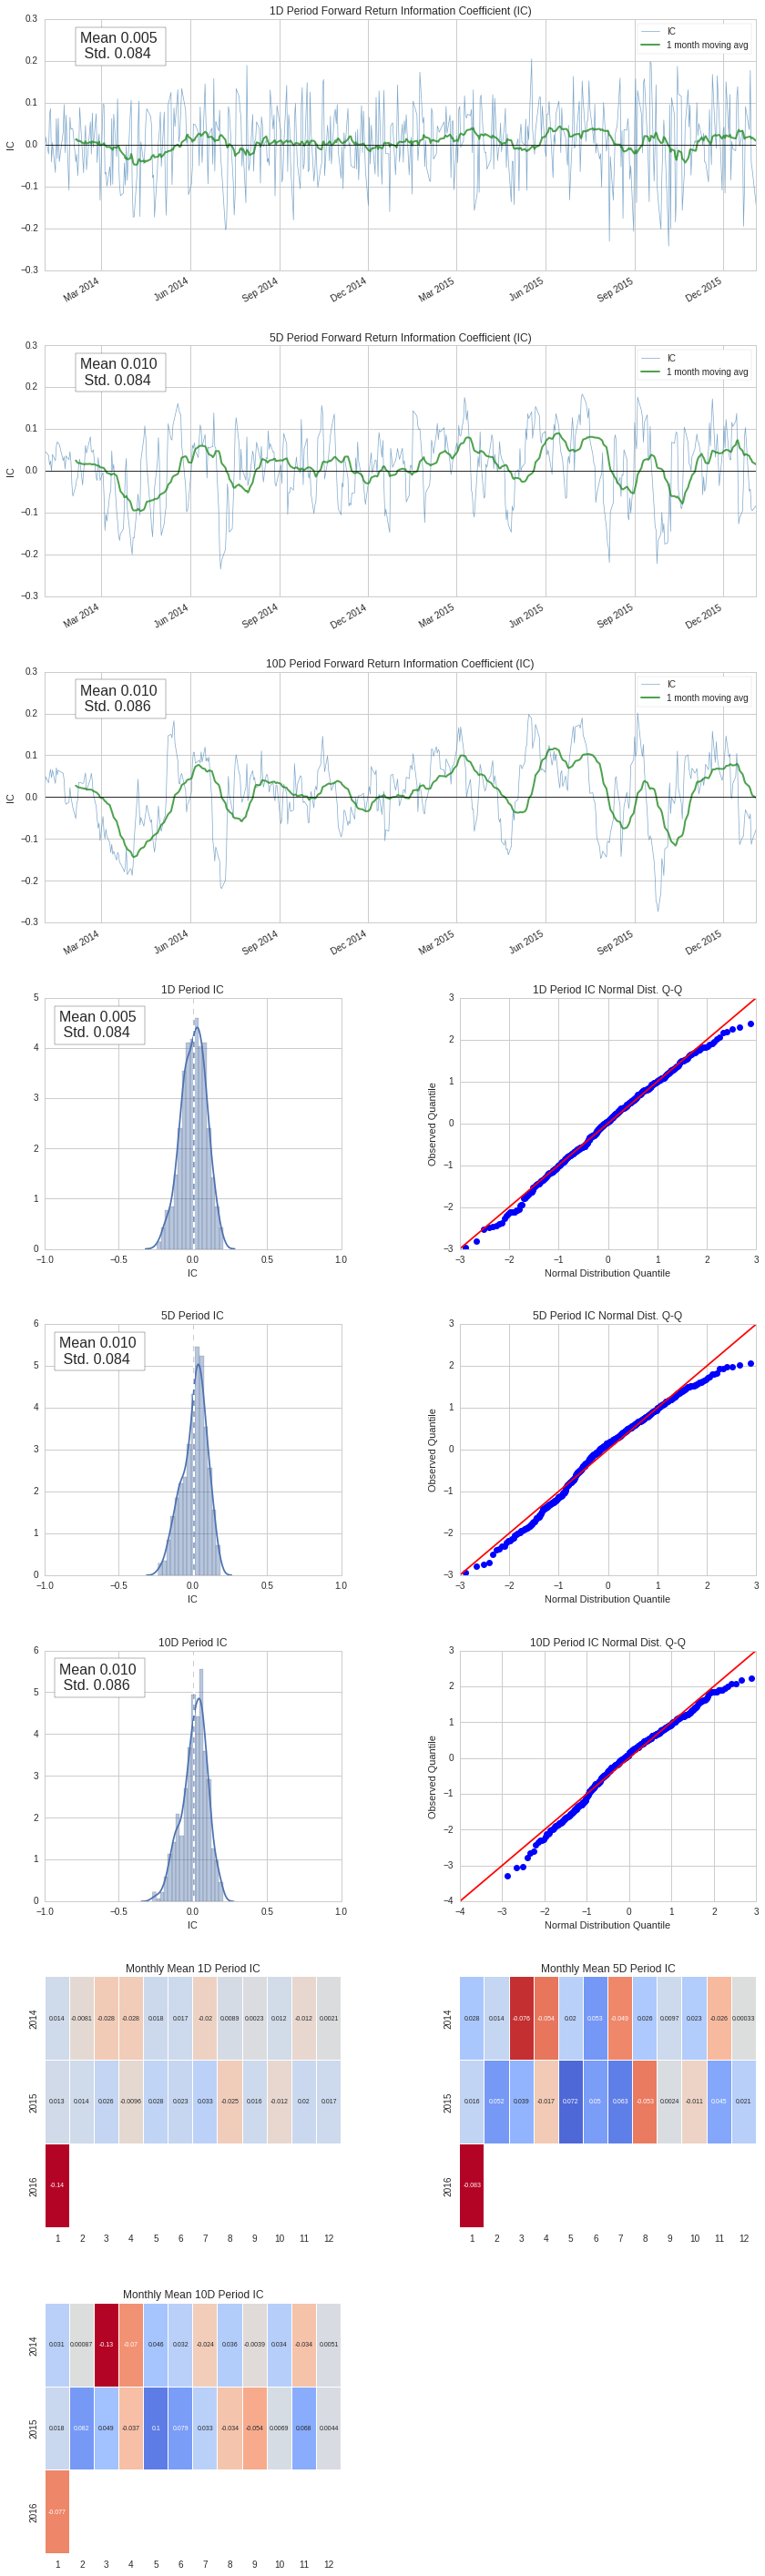

Turnover Analysis


,10D,1D,5D
Quantile 1 Mean Turnover,0.063,0.008,0.033
Quantile 2 Mean Turnover,0.097,0.013,0.052
Quantile 3 Mean Turnover,0.095,0.012,0.051
Quantile 4 Mean Turnover,0.079,0.010,0.042
Quantile 5 Mean Turnover,0.051,0.006,0.027


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.997,0.985,0.969


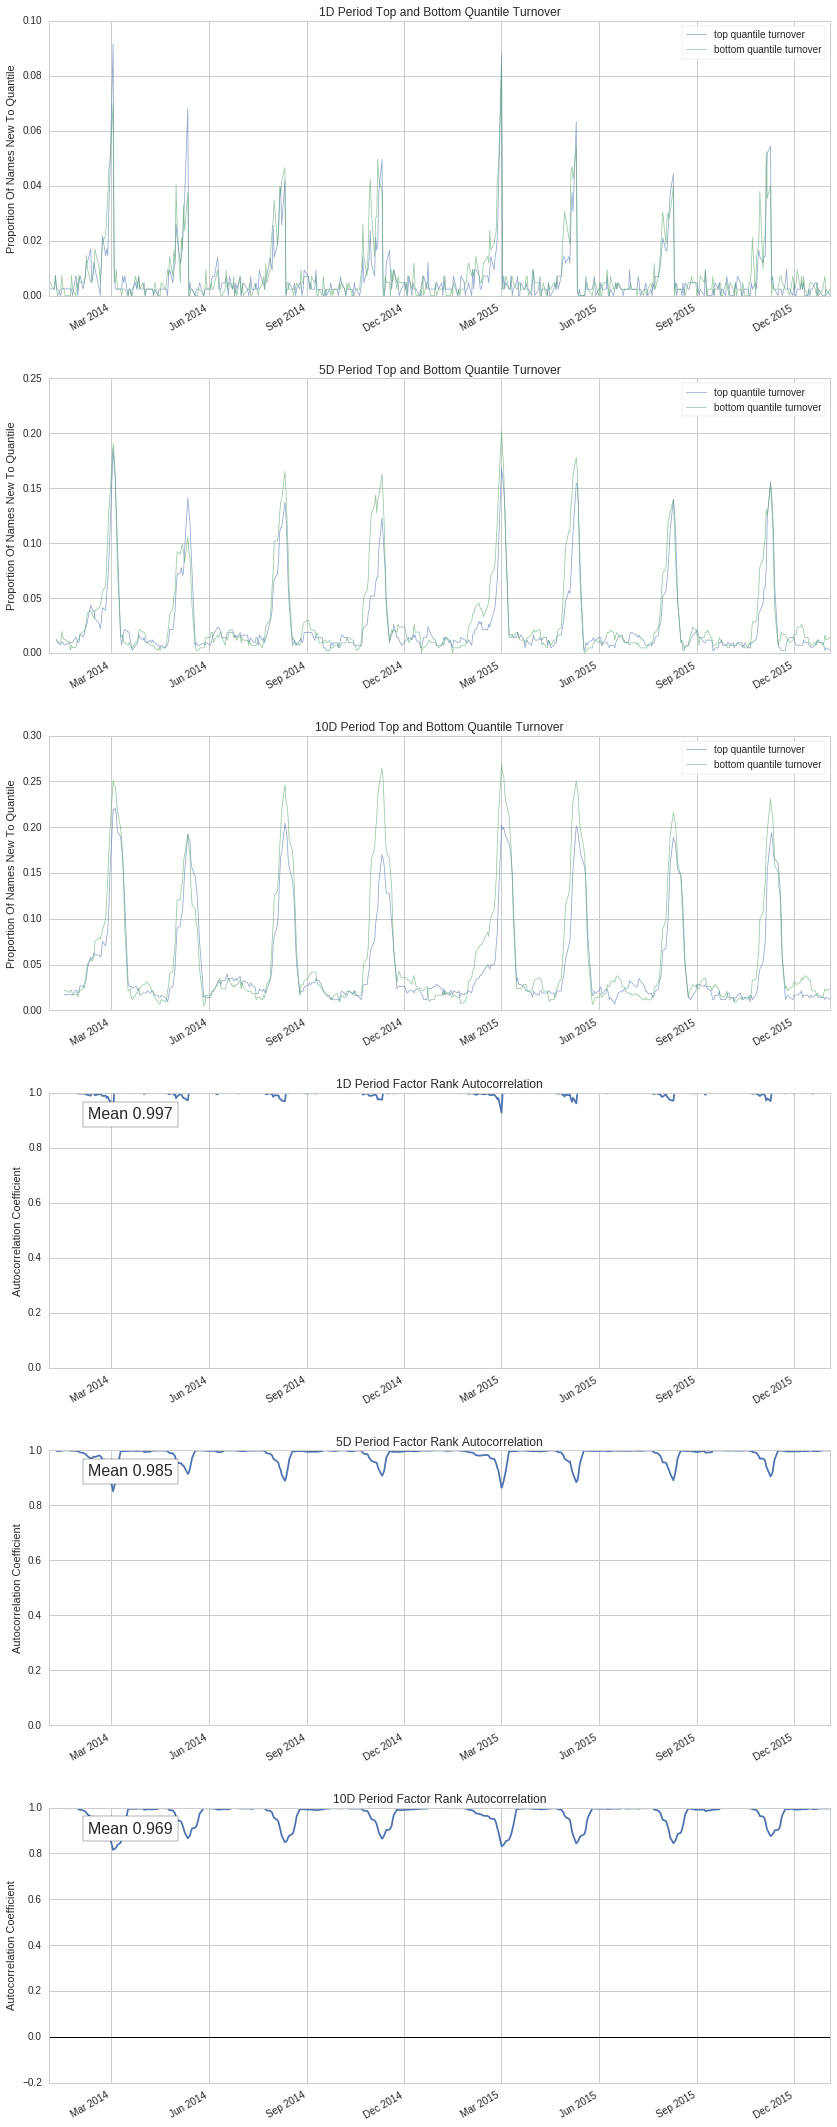

In [6]:
from alphalens.tears import create_full_tear_sheet

create_full_tear_sheet(merged_data)

## That's it!

In the next lesson, we will show you how to interpret the charts produced by `create_full_tear_sheet()`.